In [1]:
#import necessary libraries
import keras
from keras.datasets import fashion_mnist 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
import cv2
import os
from tqdm import tqdm
from skimage import color
from skimage import io
print("libraries are imported")

libraries are imported


In [2]:
#cv2.imread?

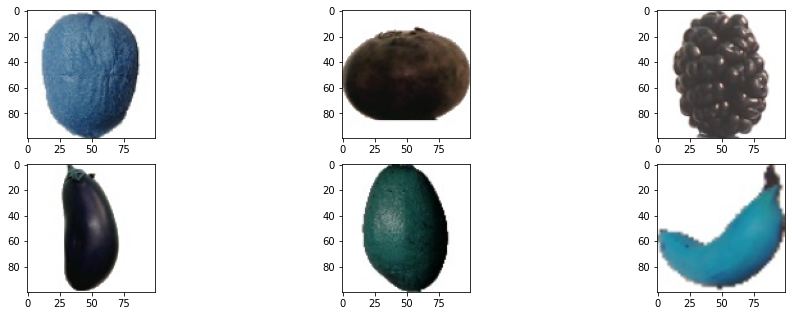

In [3]:
# Data Directory and Categories
Data_Directory = r"/media/ali/0E8E134E0E8E134E/control sapienza/third term/machine learning/homework/third homework/dataset/archive/fruits-360/Training"
Categories = ["Kiwi", "Blueberry", "Mulberry", "Eggplant", "Avocado" , "Banana"]
# Show Just one Image as an example 
i = 1
plt.figure(figsize=(16,8));
for item in Categories:
  path = os.path.join (Data_Directory, item)
  for img in os.listdir (path):
    img_array = cv2.imread (os.path.join (path, img),-1)
    #img = color.rgb2gray(io.imread(img_array))
    plt.subplot(3, 3, i); #(Number of rows, Number of column per row, item number)
    #plt.imshow
    i = i+1
    plt.imshow (img_array)
    
    break
    break
plt.show()

In [4]:
# Read and Append all Images in Dataset
dataset = []
image_size = 64 # Resize all images to this Size 
def create_training_data ():
    for item in Categories:
        path = os.path.join (Data_Directory, item)
        class_num = Categories.index ( item)
        for image in tqdm (os.listdir (path)):
            try:
                img_array = cv2.imread (os.path.join (path, image),-1) # read images with same format
                new_array = cv2.resize (img_array, (image_size, image_size )) # Resize to no
                dataset.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()
print(len(dataset))

100%|██████████| 490/490 [00:00<00:00, 1166.76it/s]

2805


In [5]:
X = [] 
y = []
for features, label in dataset:
    X.append(features)
    y.append(label)

In [6]:
X = np.array (X) 
y = np.array (y)
y = y.reshape (len (y), 1)
len (y)



2805

In [7]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, shuffle=True)

In [8]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(2244, 64, 64, 3)
(2244, 1)
(561, 64, 64, 3)
(561, 1)


(None, None)

In [10]:
#check sizes
print(X_train.shape)
print(y_train.shape)

(2244, 64, 64, 3)
(2244, 1)


In [11]:
print(X_train.shape[1])
print(X_train.shape[2])
X = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3]) #We will only be using X for clustering
X.shape

64
64


(2244, 12288)

In [12]:
y = y_train
y.shape

(2244, 1)

In [13]:
#Sanity check
print ("The shape of X is " + str(X.shape))
print ("The shape of y is " + str(y.shape))

The shape of X is (2244, 12288)
The shape of y is (2244, 1)


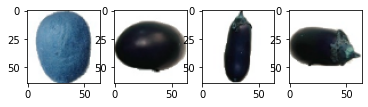

array([0])

In [14]:
#Visualise an image 
n1 = 5 #Enter Index here to View the image 
n2 = 6
n3 = 7
n4 = 8
fig1 = plt.figure(1)
chart1 = fig1.add_subplot(141)
chart2 = fig1.add_subplot(142)
chart3 = fig1.add_subplot(143)
chart4 = fig1.add_subplot(144)
chart1.imshow(X[n1].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]), cmap = plt.cm.binary)
chart2.imshow(X[n2].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]), cmap = plt.cm.binary)
chart3.imshow(X[n3].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]), cmap = plt.cm.binary)
chart4.imshow(X[n4].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]), cmap = plt.cm.binary)
plt.show()
y[n1]

In [15]:
dataSet = StandardScaler().fit_transform(X) #(mean = 0 and variance = 1)

In [16]:
variance = 0.98 
pca = PCA(variance)

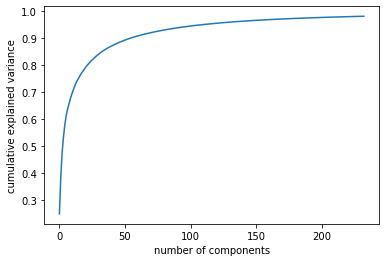

In [17]:
#fit the data according to our PCA instance
pca.fit(dataSet)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
print("Number of components before PCA  = " + str(X.shape[1]))
print("Number of components after PCA 0.98 = " + str(pca.n_components_)) #dimension reduced from 784

Number of components before PCA  = 12288
Number of components after PCA 0.98 = 233


In [19]:
dataSet = pca.transform(dataSet)

In [20]:
print("Dimension of our data after PCA  = " + str(dataSet.shape)) 

Dimension of our data after PCA  = (2244, 233)


In [21]:
approximation = pca.inverse_transform(dataSet)
print("Dimension of our data after inverse transforming the PCA  = " + str(approximation.shape))

Dimension of our data after inverse transforming the PCA  = (2244, 12288)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0]


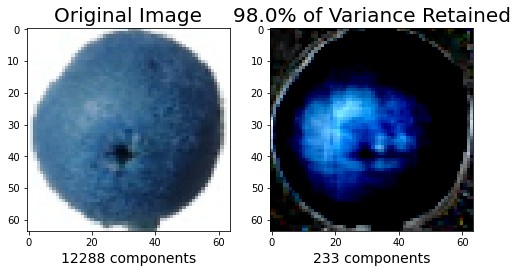

In [22]:
plt.figure(figsize=(8,4));

n = 500

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]),
              cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+' components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]),
              cmap = plt.cm.gray,);
plt.xlabel(str(dataSet.shape[1]) +' components', fontsize = 14)
plt.title(str(variance * 100) + '% of Variance Retained', fontsize = 20);

print(y_train[n])

In [23]:
k_means = KMeans(init = "k-means++", n_clusters = 6, n_init = 1000)
k_means.fit(dataSet)

KMeans(n_clusters=6, n_init=1000)

In [24]:
k_means_labels = k_means.labels_ #List of labels of each dataset
print("The list of labels of the clusters are " + str(np.unique(k_means_labels)))

The list of labels of the clusters are [0 1 2 3 4 5]


In [25]:
G = len(np.unique(k_means_labels)) #Number of labels
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue        
G

6

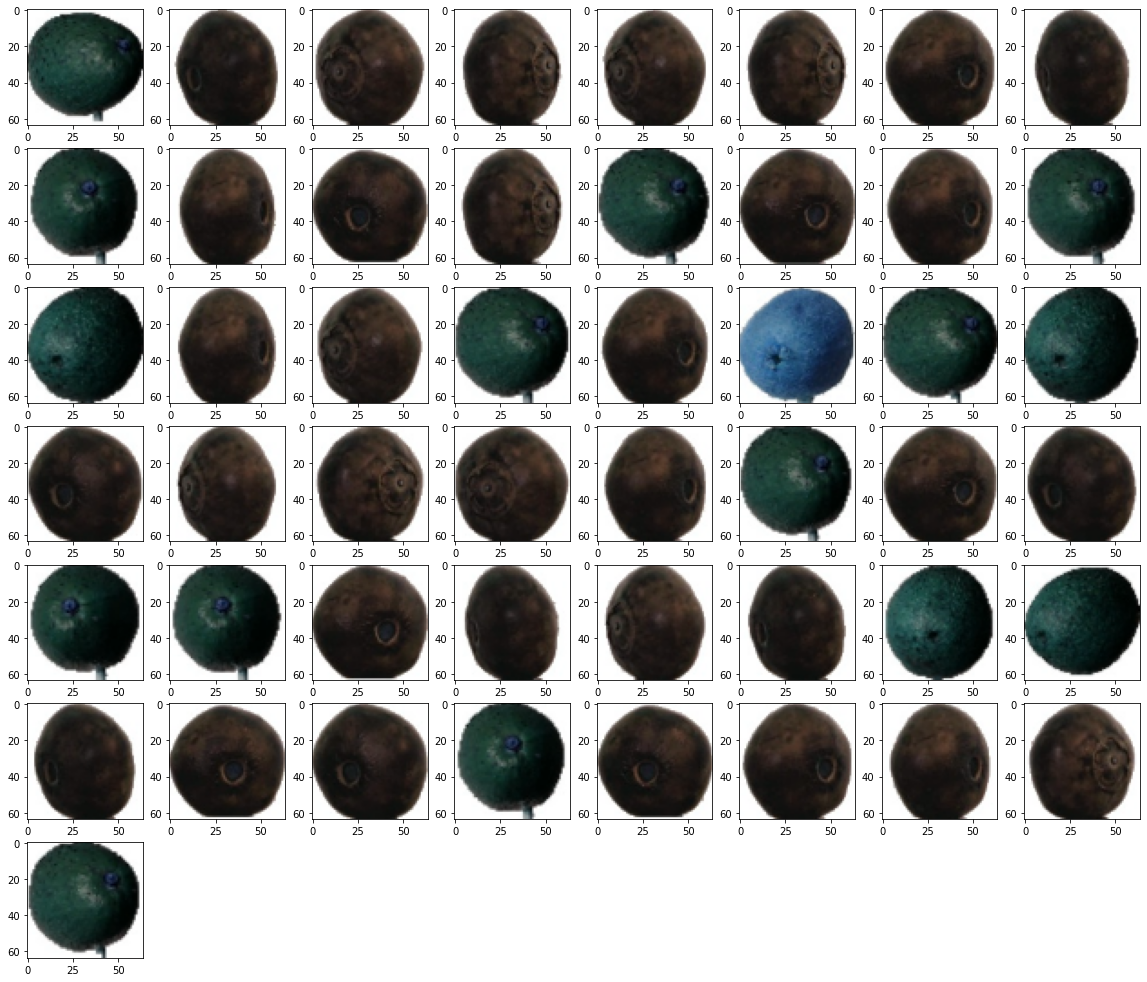

In [26]:
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 3 #enter label number to visualise
num = 50 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(8, 8, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i]].reshape(X_train.shape[1], X_train.shape[2], X_train.shape[3]), cmap = plt.cm.binary);
    
plt.show()

For Cluster 9 you can its mostly Ankle Boots with a few other items

In [27]:
Y_clust = [[] for i in range(G)]
for n in range(G):
    Y_clust[n] = y[cluster_index[n]] #Y_clust[0] contains array of "correct" category from y_train for the cluster_index[0]
    assert(len(Y_clust[n]) == len(cluster_index[n])) #dimension confirmation


In [28]:
def counter(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    label_index = dict(zip(unique, counts))
    return label_index

In [29]:
label_count= [[] for i in range(G)]
for n in range(G):
    label_count[n] = counter(Y_clust[n])

label_count[1] #Number of items of a certain category in cluster 1

{5: 361}

In [30]:
class_names = {0:'cat 1', 1:'cat 2',2: 'cat 3',3: 'cat 4',4: 'cat 5',5:
               'cat6'} #Dictionary of class names

#A function to plot a bar graph for visualising the number of items of certain category in a cluster
def plotter(label_dict):
    plt.bar(range(len(label_dict)), list(label_dict.values()), align='center')
    a = []
    for i in [*label_dict]: a.append(class_names[i])
    plt.xticks(range(len(label_dict)), list(a), rotation=45, rotation_mode='anchor')

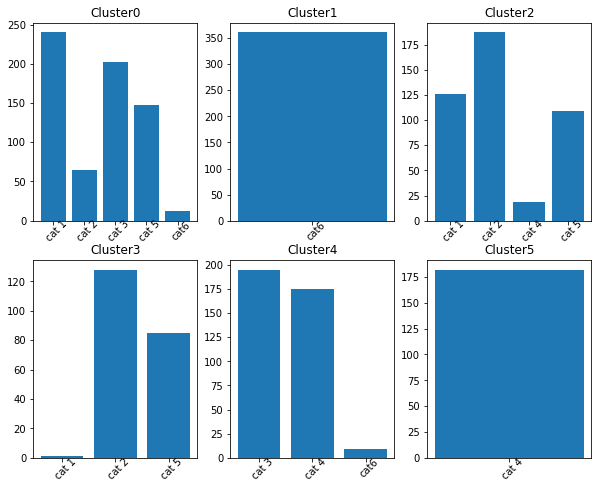

In [31]:
plt.figure(figsize=(10,8))
for i in range (1,7):
    plt.subplot(2, 3, i)
    plotter(label_count[i-1]) 
    plt.title("Cluster" + str(i-1))

In [32]:
k_means_cluster_centers = k_means.cluster_centers_ #numpy array of cluster centers
k_means_cluster_centers.shape #comes from 10 clusters and 420 features 

(6, 233)

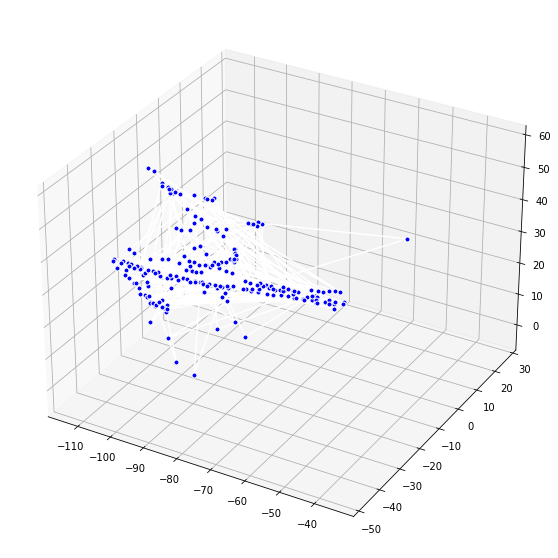

In [33]:
#cluster visualisation
my_members = (k_means_labels == 3) #Enter different Cluster number to view its 3D plot
my_members.shape
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot(dataSet[my_members, 0], dataSet[my_members,1],dataSet[my_members,2], 'w', markerfacecolor="blue", marker='.',markersize=10)

In [35]:
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

In [36]:
layout = go.Layout(
    title='<b>Cluster Visualisation</b>',
    yaxis=dict(
        title='<i>Y</i>'
    ),
    xaxis=dict(
        title='<i>X</i>'
    )
)

colors = ['red','green' ,'blue','purple','magenta','yellow','cyan','maroon']
trace = [ go.Scatter3d() for _ in range(11)]
for i in range(0,8):
    my_members = (k_means_labels == i)
    index = [h for h, g in enumerate(my_members) if g]
    trace[i] = go.Scatter3d(
            x=dataSet[my_members, 0],
            y=dataSet[my_members, 1],
            z=dataSet[my_members, 2],
            mode='markers',
            marker = dict(size = 2,color = colors[i]),
            hovertext=index,
            name='Cluster'+str(i),
   
            )

fig = go.Figure(data=[trace[0],trace[1],trace[2],trace[3],trace[4],trace[5],trace[6],trace[7],trace[8],trace[9]], layout=layout)
    
py.offline.iplot(fig)
